# Jared Mlekush

## Feature Importance and Selection

#### Inspiration and code snippets taken from: https://github.com/parrt/msds689/blob/master/projects/featimp/featimp.md 

## <b>Flow:</b> 
    - Correlation
    - Importance strategies
    - Model-based importance strategies
    - Visualizing importances and Comparing strategies
    - Automatic feature selection algorithm
    - Variance and empirical p-values for feature importances

<b><i>Why does knowing feature importance matter?</i></b>

While having a good model that predicts and classifies well is important - being able to interpret the model is usually quite important as well. Knowing a features relative importance tells us information and possible application. For example, if in a multivariable analysis of, say salary, you notice that while a small amount of the difference in salary from person to person is due to their gender, but ALSO their education, years of experience, school they came from, how agreeable they are, and so on - we see that to attribute all of the variation to just one feature may not be a very prudent thing to do. Another example would be in the amount of money someone is willing to pay for a car. While age, and gender may play a role, it is likely that the most important feature would be something like salary.



<b><i>What kind of scores do you get when checking for importance and can you take them at face value?</i></b>

These scores are often normalized between 0 and 1 and are not very telling on their own, but only when other relative rank/magnitude scores are takne into consideration. All taken together allows us to drop irrelevant features.



<b><i>What exactly is feature importance?</i></b>

In general, feature importance gives the relative predictive power among the features found in the dataset. Essentially, if you have 10 features in your data and you want to use them to predict, feature importance will, in a way, "rank" them from most important feature in the prediction process to least important. If through your due diligence, you find that 5 of the 10 features give you almost the exact same predictive capabilities as all 10 features, you can opt to drop the 5 less important features. Giving you a simpler, more efficient model that is likely easier to interpret as well. Additional to this, we would like to know how much of an "impact" the feature has - that is to say, while importance gives us the relative ranking of importance (1st place - 10th place) it doesn't necessarily mean the feature in 10th is unimportant, just "less" important in predictive capabilities than the other features. This is where "impact" comes in, which tells us "how much" the feature aids in the predicting process. 


# Data Used 

In [3]:
# Boston Dataset
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# Without getting to bogged down in the code. Here are baseline models 
# and their respective prediction capabilites straight out of the gate

RandomForestRegressor - RMSE: 9.14
ExtraTreesRegressor - RMSE: 8.64
XGBRegressor      - RMSE: 8.38


# Correlation 

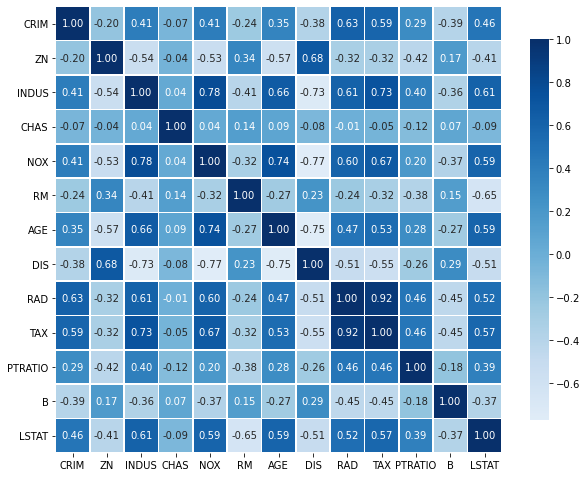

In [12]:
# Correlation Heat Map - may help us tell if spearman is a good choice.

# Importance Strategies 

<b>Spearman Rank </b>

A simple technique to identify important regression features is to rank them by their Spearman's rank correlation coefficient. When done correctly, the feature with the largest coefficient is interpretted to be the most important feature of the bunch. This method measures single-feature relevance importance. Unfortunately, because of this, it suffers when some of the features are co-dependent. For example if you have longitude as one feature and latitude as another, how important they are will be taken individually and not as a pair. If a group of features have a similar relationship to the response variable, they will receive the same or similar ranks - however one of them should actually be considered more important.

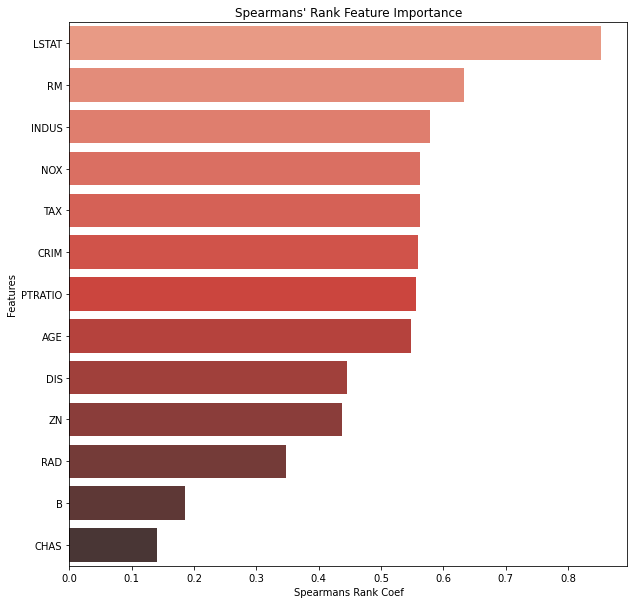

In [11]:
# Below is the relative importance of each feature according to Spearman Rank
# ['LSTAT', 'RM', 'INDUS', 'NOX', 'TAX', 'CRIM', 'PTRATIO', 'AGE', 'DIS', 'ZN', 'RAD', 'B', 'CHAS']

In [18]:
# LSTAT is the supposed, most important feature. As a quick check, if I drop LSTAT and recalculate the Spearman Rank
# the much higher error, seen below supports the idea that LSTAT is important when it comes to prediction (Also RMSE)

RandomForestRegressor - MSE: 49.23
ExtraTreesRegressor - MSE: 36.77
XGBRegressor      - MSE: 35.43


<b> Principle Component Analysis </b>

Principle component analysis (PCA) is another method that can be used. PCA transforms data into a new space characterized by eigenvectors and identifies features that explain the most variance in the new space. If the first principal component covers a large percentage of the variance, the "load" associated with a given component can indicate how important a feature in the original X space.

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
      PC  feature   loading  type
0    PC1      TAX  0.949741  best
1    PC2        B -0.956181  best
2    PC3      AGE -0.755863  best
3    PC4       ZN  0.768059  best
4    PC5     CRIM  0.952338  best
5    PC6    LSTAT  0.887826  best
6    PC7    INDUS  0.785949  best
7    PC8      RAD -0.854360  best
8    PC9  PTRATIO  0.965860  best
9   PC10      DIS  0.964833  best
10  PC11       RM -0.994176  best
11  PC12     CHAS  0.999595  best
12  PC13      NOX  0.999729  best


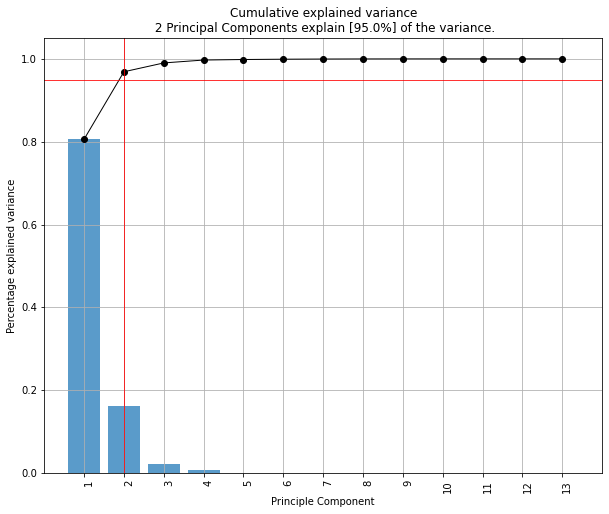

<Figure size 432x288 with 0 Axes>

This implies that 95% of the variance comes from the first 2 components: TAX and B
- ['TAX', 'B', 'AGE', 'ZN', 'CRIM', 'LSTAT', 'INDUS', 'RAD', 'PTRATIO', 'DIS', 'RM', 'CHAS', 'NOX']

In an effort to deal with codependencies, certain techniques rank features not just by relevance but also by low redundancy. Redundancy is the amount of information shared between codependent features. This is where the idea came for minimal-redundancy-maximal-relevance (mRMR). Implemening this gave the following importance list:

['LSTAT', 'RM', 'PTRATIO', 'B', 'INDUS', 'CHAS', 'CRIM', 'ZN', 'TAX', 'AGE', 'NOX', 'RAD', 'DIS']

# Model-based importance strategies 

Two main model based importance strategies to be used here - Permutation and Drop columns

<b>Permutation</b>

Pros and cons:
- Easy to understand
- Simple to implement
- Works for any machine learning model
- No need to retrain the model and therefore much more efficient than drop column importance

- <i>Can create records tsuch as "pregnant male" which does not make sense</i>

In [21]:
# Results from applying Permutation to my data
# List: ['LSTAT', 'RM', 'DIS', 'PTRATIO', 'NOX', 'CRIM', 'AGE', 'TAX', 'B', 'INDUS', 'CHAS', 'RAD', 'ZN']

<b>Drop Columns</b>

Pros and cons:
- Easy to understand
- Simple to implement
- Direct means of measuring importance
- Works for any machine learning model
-------
- <i>Very expensive because you must retrain the model each time you drop another feature</i>
- <i>Codependent features often result in 0 or very low importance</i>

In [ ]:
# Results from applying Drop Coulmns to my data
# List: ['RM', 'LSTAT', 'DIS', 'NOX', 'B', 'PTRATIO', 'TAX', 'ZN', 'CHAS', 'INDUS', 'RAD', 'CRIM', 'AGE']

# Visualizing importances and Comparing them

A Bunch of appropriately titled graphs, which hopefully are enlightening

In [30]:
# Comparison of Drop and Permutation with different models

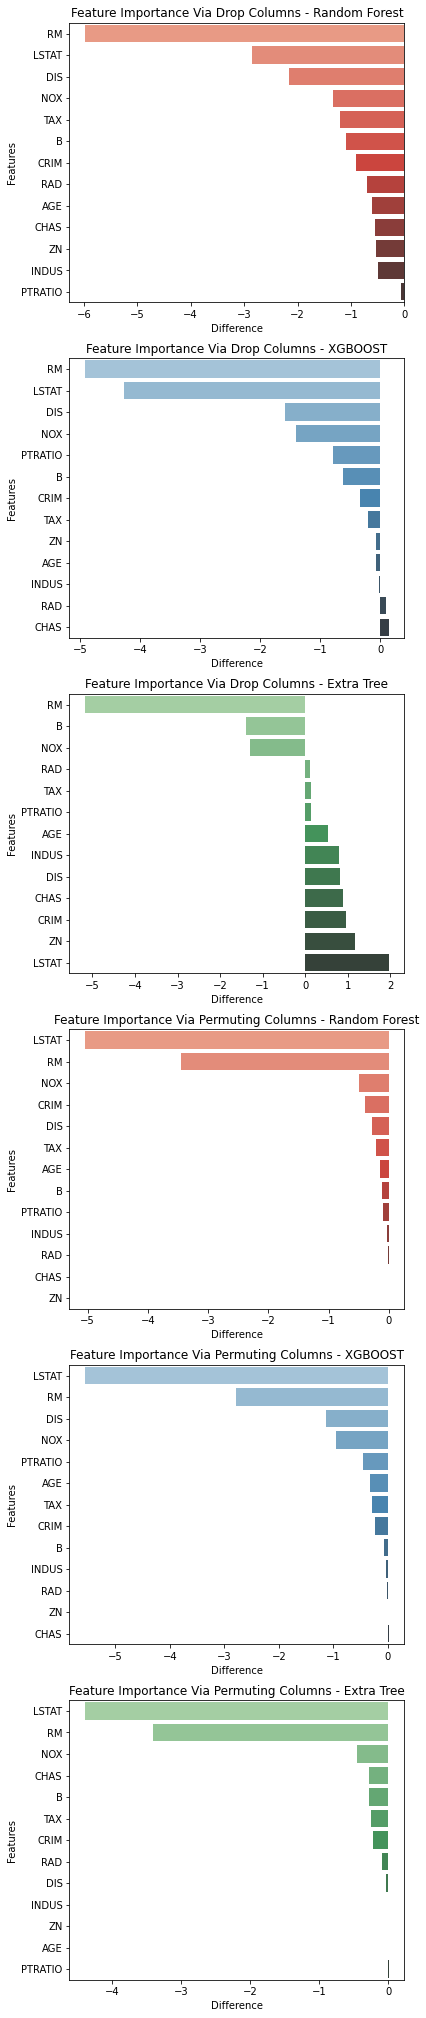

# K important features
- That is - the respective RMSE is shown on the y axis and shows the RMSE of the model if only "x" # of features are used

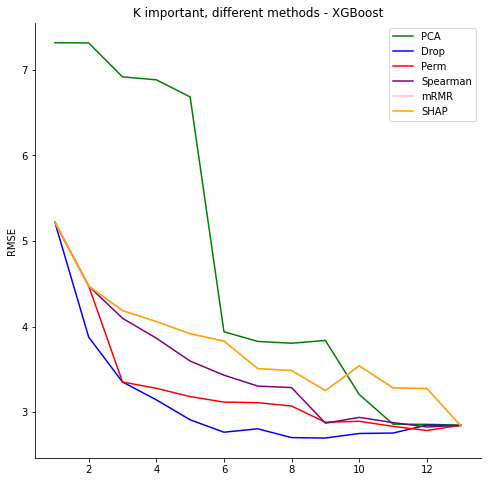

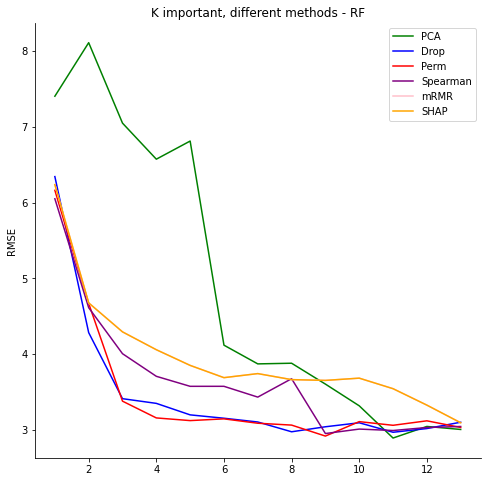

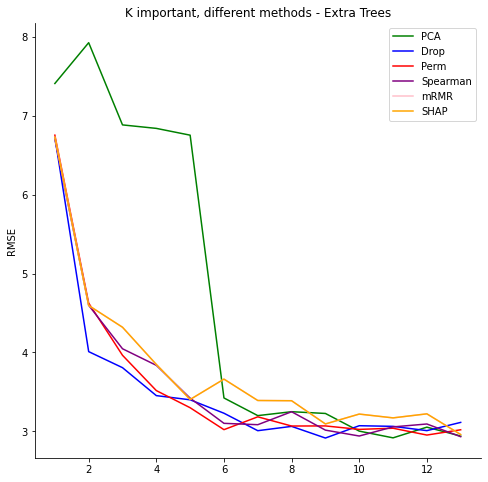

# Automatic Feature Selection

When you have an ordering of features from most to least important, you can implement a mechanism to drop off unimportant features and keep the top k. The automated mechanism then selects the top k features automatically that will give you the best validation error. So we get a baseline metric, then drop the least important feature, retrain and get new metric, rinse and repeat until the error begins to get worse. If notable increase in error, one too many features have been dropped. Because of codependencies between features, you will need to recompute the feature importances after every dropped feature.

In [ ]:
# Utilizing strategy above gave:

List and respective RMSE. 
You can see the lowest error was achieved at 8 features

(['LSTAT', 'RM', 'DIS', 'PTRATIO', 'NOX', 'CRIM', 'AGE', 'TAX', 'B'],
 {12: 1.252324166666673,
  11: 1.443309000000008,
  10: 1.2899570980392252,
  9: 1.4238003039215748,
  8: 1.0889108529411822,
  7: 1.4791667058823594,
  6: 1.1803099901960858,
  5: 1.561167627450988,
  4: 1.6885886568627495,
  3: 2.544817764705884,
  2: 3.829522421568625,
  1: 10.11504784116953})

Graphical representaion of this below:


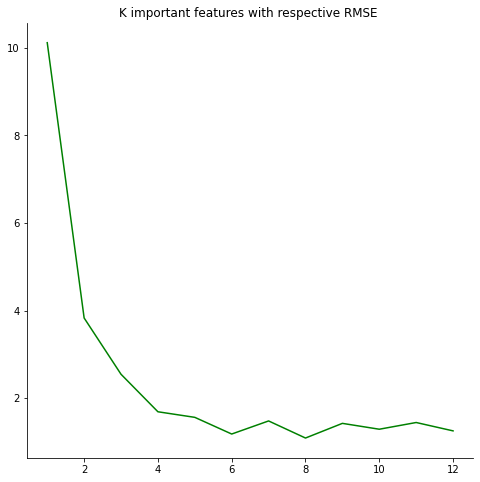

# Variance and empirical p-values for feature importances

Given these feature importances, you can get several results by bootstrapping the X,y data. So you can compute variance or standard deviation of the feature importances. Here is an example of what I mean, with the data using error bars:

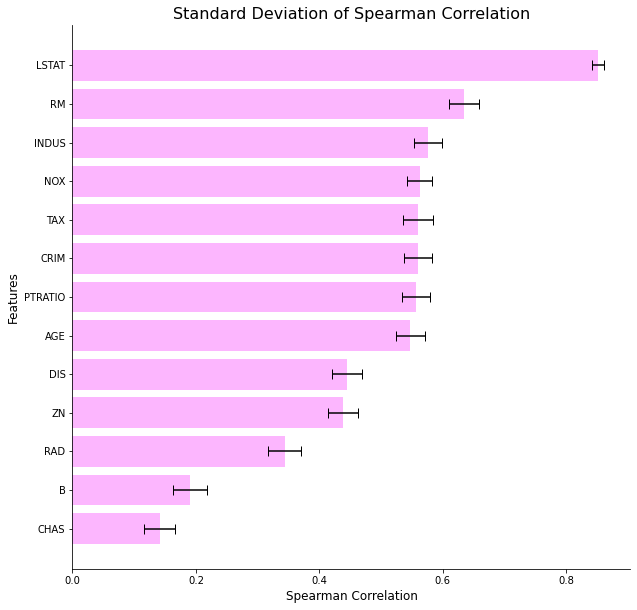

<b>Take Home:</b> <i>Feature Selection (along with cleaning the data) should be the very first things you do when given data</i>

- Benefits of performign feature selection:
    - <i>Reduces Overfitting:</i> Less redundant data means less opportunity to make decisions based on noise.
    - <i>Improves Accuracy:</i> Less misleading data means modeling accuracy improves.
    - <i>Reduces Training Time:</i> fewer data points reduce algorithm complexity and algorithms train faster.
